# Paquetes a utilizar

In [1]:
import keras
print("keras : ", keras.__version__)

import tensorflow
print("Tensorflow :", tensorflow.__version__)

import numpy as np
print("Numpy :", np.__version__)

keras :  3.8.0
Tensorflow : 2.18.0
Numpy : 1.26.4


In [2]:
!pip show keras

Name: keras
Version: 3.8.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [3]:
# INformacion de keras
!cat $HOME/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}

In [1]:
#
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# Acceso al numero y caracteristicas de nucleos de la cpu
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.192
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [4]:
# NUmero de GPU
len(tf.config.experimental.list_physical_devices("GPU"))

1

In [5]:
# Verifiquemos que nuestro backend tiene soporte para CUDA
tf.test.is_built_with_cuda()

True

In [6]:
# Mostremos informacion del driver y de la version de CUDA
!nvidia-smi

Wed Mar 12 00:47:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Primer modelo de tipo Red Neuronal (Perceptron Multicapa)

In [ ]:
# Primer Paso : Cargar modulos y datos
# Segundo Paso : Definicion de un modelo en keras
# Tercer Paso : "Compilar" el modelo definido en el segundo paso
# Cuarto Paso : Ajustar el modelo a nuestro conjunto de datos
# Quinto Paso  : Evaluacion del modelo
# Sexto Paso : Juntamos los primeros cinco pasos y lo empaquetamos en una funcion
# Septimo Paso : Usar el modelo para construir/calular predicciones

## Primer Paso : Cargar modulos y datos

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keras
from keras.models import Sequential
from keras.layers import Dense

# Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/pima-indians-diabetes.csv",
                      header = None)

# PIma Indians
# Problema de clasificacion (Ultima columna es la variable dependiente)
X = dataset.loc[:, 0:7]
y = dataset.loc[:,8]

# Deseo obtener : f(X) aprox y
# f : Perceptron Multicapa


## Segundo Paso : Definicion de un modelo en keras


In [8]:
# Creamos el modelo : Instancia de la clase Sequential
model1 = Sequential()

# Agregamos capas ocultas a nuestra primera red neuronal

# Primera Capa oculta
model1.add(Dense(input_dim = 8,
                 units = 15,
                 activation = "relu",
                 name = "1eraCapaOculta_15neuronas"))

# Segunda capa oculta
model1.add(Dense(units = 12,
                 activation = "tanh",
                 name = "2daCapaOculta_12neuronas"))

# Tercera Capa oculta
model1.add(Dense(units = 12,
                 activation = "tanh",
                 name = "3eraCapaOculta_12neuronas"))

# Agregamos la capa de salida
model1.add(Dense(units = 1,
                 activation = "sigmoid",
                 name = "Capa_de_Salida"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model1

<Sequential name=sequential, built=True>

## Correccion del Segundo Paso : Agregar una capa Input

In [21]:
# Creamos el modelo : Instancia de la clase Sequential
model1 = Sequential()

# Agregamos capas ocultas a nuestra primera red neuronal

# Agregamos las variables independientes a nuestra arquitectura
# mediante el uso de una capa Input
from keras.layers import Input
model1.add(Input(shape = (8,),
                 name = "Capa_de_Entrada"))


# Primera Capa oculta
model1.add(Dense(units = 15,
                 activation = "relu",
                 name = "1eraCapaOculta_15neuronas"))

# Segunda capa oculta
model1.add(Dense(units = 12,
                 activation = "tanh",
                 name = "2daCapaOculta_12neuronas"))

# Tercera Capa oculta
model1.add(Dense(units = 12,
                 activation = "tanh",
                 name = "3eraCapaOculta_12neuronas"))

# Agregamos la capa de salida
model1.add(Dense(units = 1,
                 activation = "sigmoid",
                 name = "Capa_de_Salida"))


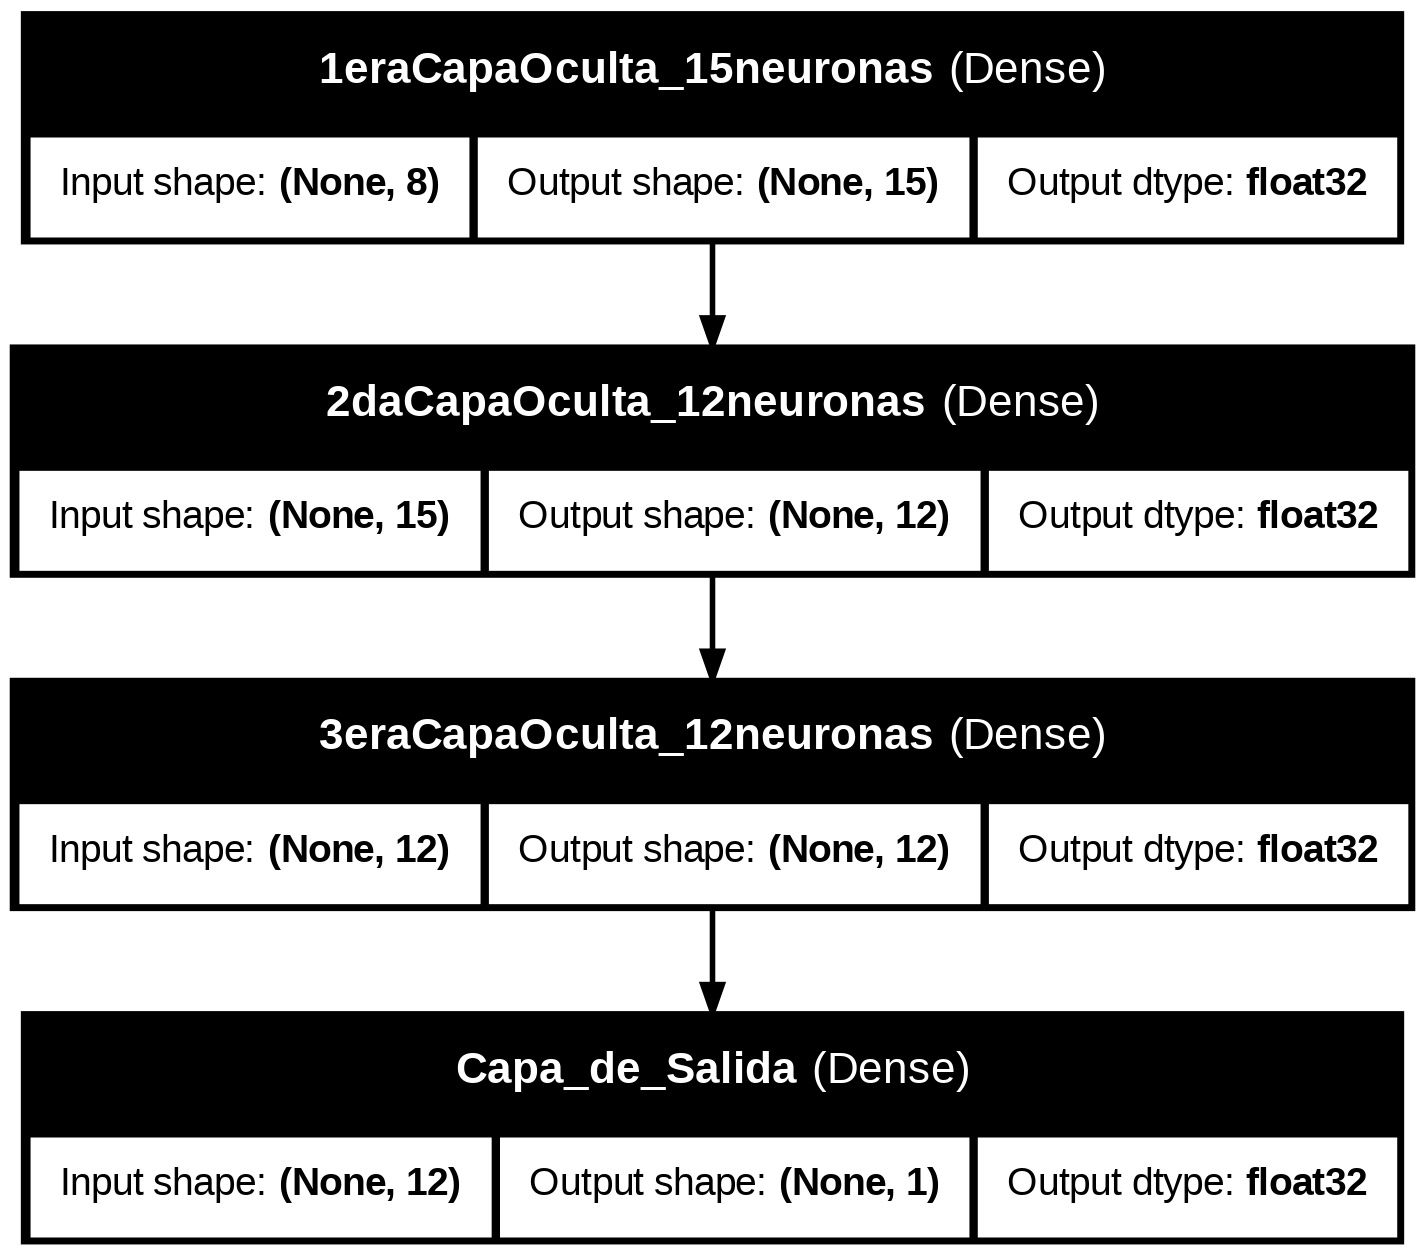

In [12]:
# Visualicemos nuestros primeros pasos para obtener una red neuronal
from keras.utils import plot_model
plot_model(model1,
           to_file = "Primera_Red_Neuronal.png",
           show_shapes = True,
           show_dtype = True,
           show_layer_names = True)

In [13]:
# Metodo summary
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 1eraCapaOculta_15neuronas (Dense)    │ (None, 15)                  │             135 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2daCapaOculta_12neuronas (Dense)     │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3eraCapaOculta_12neuronas (Dense)    │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Capa_de_Salida (Dense)               │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 496 (1.94 KB)

 Trainable params: 496 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Veamos los pesos asignados de manera aleatoria a la arquitectura
model1.weights

[<Variable path=sequential_1/1eraCapaOculta_15neuronas/kernel, shape=(8, 15), dtype=float32, value=[[-0.10190204 -0.4460534  -0.12697574 -0.08589885 -0.08438373 -0.2179915
   -0.29633698  0.0397172   0.41269857  0.48598248  0.23263556 -0.11362928
    0.38110173  0.17021096  0.49558288]
  [-0.4609823  -0.18039158 -0.3964862  -0.3663567   0.07907248 -0.14148611
   -0.45439205 -0.47335616  0.34338343  0.10403293  0.28773332 -0.26712796
    0.29598784  0.36587304  0.39644128]
  [ 0.34216732 -0.10592663 -0.42716354  0.01501453  0.44618112  0.06770617
   -0.00480455 -0.07842416 -0.42179018  0.09568954 -0.35996604  0.4550013
   -0.12480927 -0.32508764  0.26727408]
  [-0.23002756  0.27456087 -0.36693466 -0.10612318  0.24369794  0.04572511
   -0.3459117  -0.45493224 -0.28240392 -0.3297815   0.27608305 -0.1435956
    0.16752708  0.30671751  0.37821144]
  [-0.36482286  0.13397306  0.4211436   0.38443112 -0.44799334  0.2484433
    0.33120966  0.38616508 -0.30861622  0.18523657 -0.49579385  0.16273

## Tercer Paso : "Compilar" el modelo definido en el segundo paso


In [22]:
model1.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

## Cuarto Paso : Ajustar el modelo a nuestro conjunto de datos


In [23]:
historia_ajuste = model1.fit(X,y,
                             epochs = 50,
                             batch_size = 4)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4910 - loss: 0.7918
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6360 - loss: 0.6587
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6571 - loss: 0.6432
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6259 - loss: 0.6569
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6793 - loss: 0.6159
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6606 - loss: 0.6348
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6133 - loss: 0.6617
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6693 - loss: 0.6136
Epoch 9/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6433 - loss: 0.6347
Epoch 10/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - loss: 0.6209
Epoch 11/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5986 - loss: 0.6630
Epoch 12/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

## Quinto Paso  : Evaluacion del modelo


In [24]:
model1.evaluate(X,y)
# 10 epocas : 0.6744791865348816
# 50 epocas : 0.7239583134651184

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.6163  


[0.5922664403915405, 0.69921875]

## Sexto Paso : Juntamos los primeros cinco pasos y lo empaquetamos en una funcion


In [5]:
X = dataset.loc[:, 0:7]
y = dataset.loc[:,8]


def analisis_model1(X,num_epocas):
  # Creamos el modelo : Instancia de la clase Sequential
  model1 = Sequential()

  # Agregamos capas ocultas a nuestra primera red neuronal

  # Agregamos las variables independientes a nuestra arquitectura
  # mediante el uso de una capa Input
  from keras.layers import Input
  model1.add(Input(shape = (8,),
                  name = "Capa_de_Entrada"))


  # Primera Capa oculta
  model1.add(Dense(units = 15,
                  activation = "relu",
                  name = "1eraCapaOculta_15neuronas"))

  # Segunda capa oculta
  model1.add(Dense(units = 12,
                  activation = "tanh",
                  name = "2daCapaOculta_12neuronas"))

  # Tercera Capa oculta
  model1.add(Dense(units = 12,
                  activation = "tanh",
                  name = "3eraCapaOculta_12neuronas"))

  # Agregamos la capa de salida
  model1.add(Dense(units = 1,
                  activation = "sigmoid",
                  name = "Capa_de_Salida"))

  model1.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

  historia_ajuste = model1.fit(X,y,
                             epochs = num_epocas,
                             batch_size = 4)

  loss_acc = model1.evaluate(X,y)

  return historia_ajuste, loss_acc


In [ ]:
output_exp1 = analisis_model1(X,num_epocas=50)

In [14]:
output_exp1
# [0.5637994408607483, 0.72265625]

(<keras.src.callbacks.history.History at 0x7c3840462f10>,
 [0.5596723556518555, 0.703125])

In [16]:
output_exp1[1][1]

0.703125

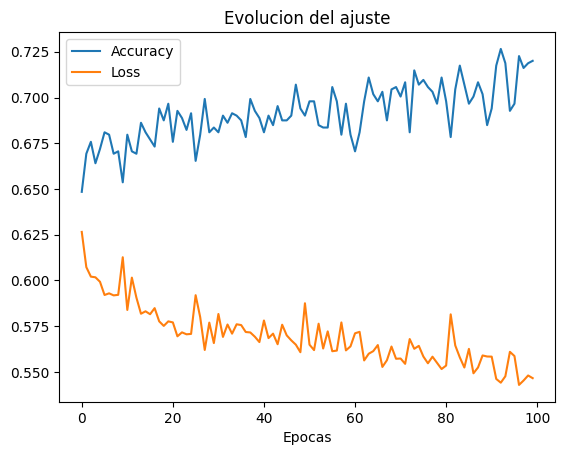

In [12]:
# Analicemos que ocurrio en cada una de las 50 epocas de ajuste
HistoriaAjuste = output_exp1[0]
plt.plot(HistoriaAjuste.history["accuracy"])
plt.plot(HistoriaAjuste.history["loss"])
plt.title("Evolucion del ajuste")
plt.legend(["Accuracy", "Loss"])
plt.xlabel("Epocas")
plt.show()


In [ ]:
# Para la arquitectura planteada en la funcion analisis_model1, considerando
# un numero de epocas igual a 50. ¿Cual es el indicador de calidad que consideraria
# para esta configuracion?
num_exp_config = 10**3
lista_acc = list()
for exp in range(num_exp_config):
  output_exp = analisis_model1(X,num_epocas=50)
  lista_acc.append(output_exp[1][1])


In [19]:
(30*1000)/(60*60)

8.333333333333334

## Septimo Paso : Usar el modelo para construir/calular predicciones

In [26]:
# El metodo predict del objeto model1
predicciones = model1.predict(X)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


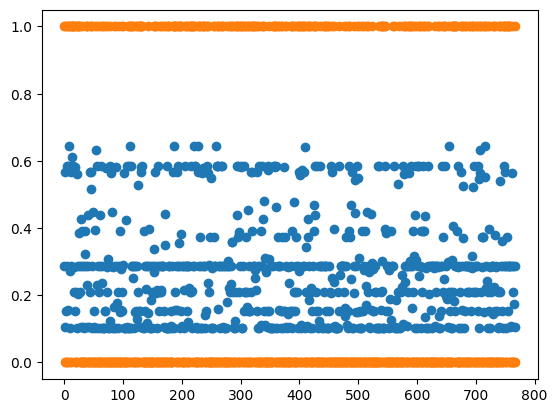

In [30]:
# Mostremos como se distribuyen los valores que pronostica nuestra primera red neuronal
plt.scatter(x = range(len(predicciones)),
            y = predicciones)
plt.scatter(x = range(len(y)),
            y = y)
plt.show()

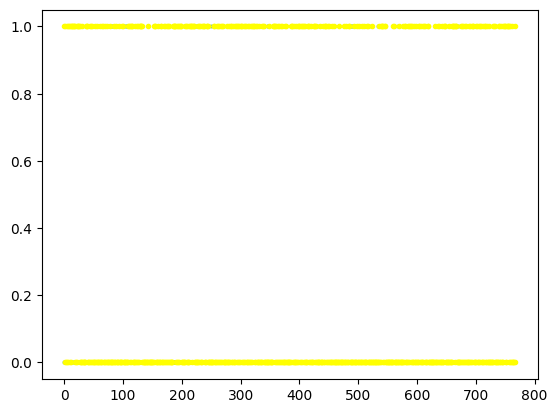

In [38]:
# Binaricemos las predicciones de nuestra red neuronal
Umbral1 = 0.4
y_forecast_1 = [0 if p[0] <= Umbral1 else 1 for p in predicciones]

# Mostremos los resultados de la binarizacion
plt.scatter(x = range(len(y_forecast_1)),
            y = y_forecast_1,s = 5, c = "green",alpha = 0.3)
plt.scatter(x = range(len(y)),
            y = y,s = 9, c = "yellow")
plt.show()

In [42]:
# Juntemos los valores reales (y) con el pronostico (y_forecast_1)
result1 = pd.DataFrame.from_dict({"y": y,"forecast":y_forecast_1 })


# Calculemos un indicador de calidad :
from sklearn import metrics
metrics.accuracy_score(result1.y, result1.forecast)

0.6901041666666666

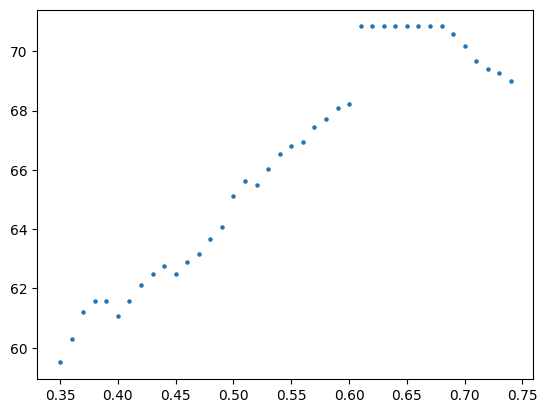

In [46]:
# Analicemos como afecta al poder predictivo, la eleccion del umbral al binarizar
# los resultados que pronostica el modelo
lista_acc = []
percentiles = np.arange(0.35, 0.75, 0.01)

for percentil in percentiles:
  # definicion  del umbral
  umbral = np.quantile(predicciones, q = percentil)

  # Binarizamos las predicciones
  pred_umbral = [0 if p[0] <= umbral else 1 for p in predicciones]

  # Calculo del indicador de calidad
  from sklearn import metrics
  lista_acc.append(metrics.accuracy_score(y, pred_umbral)*100)

acc_output = pd.DataFrame.from_dict({"percentil": percentiles, "Accuracies": lista_acc})

# Mostremos los resultados
plt.scatter(x = acc_output.percentil,
            y = acc_output.Accuracies,
            s = 5)
plt.show()

In [50]:
acc_output.sort_values(by = "Accuracies", ascending= False)

,percentil,Accuracies
27,0.62,70.833333
26,0.61,70.833333
29,0.64,70.833333
28,0.63,70.833333
30,0.65,70.833333
31,0.66,70.833333
33,0.68,70.833333
32,0.67,70.833333
34,0.69,70.572917
35,0.70,70.182292
